In [1]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

# the more advanced python visualization library
import seaborn as sns

# apply style to all the charts
sns.set_style('whitegrid')

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# convert scientific notation to decimals
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
# https://www.capitalbikeshare.com/system-data
df = pd.read_csv('data/2011-capitalbikeshare-tripdata.csv')
df.head(10)

,Start date,Start station number
0,2011-01-01 00:01:29,31620
1,2011-01-01 00:02:46,31105
2,2011-01-01 00:06:13,31400
3,2011-01-01 00:09:21,31111
4,2011-01-01 00:28:26,31104
5,2011-01-01 00:32:33,31605
6,2011-01-01 00:35:48,31203
7,2011-01-01 00:36:42,31203
8,2011-01-01 00:45:55,31201
9,2011-01-01 00:46:06,31201


In [3]:
# set the datetime column as the index
df['Start date'] = pd.to_datetime(df['Start date'])
df.set_index('Start date', inplace=True)
df.head(10)

,Start station number
Start date,
2011-01-01 00:01:29,31620
2011-01-01 00:02:46,31105
2011-01-01 00:06:13,31400
2011-01-01 00:09:21,31111
2011-01-01 00:28:26,31104
2011-01-01 00:32:33,31605
2011-01-01 00:35:48,31203
2011-01-01 00:36:42,31203
2011-01-01 00:45:55,31201


# Resampling

In [4]:
# Resampling daily
df_daily = df.resample('D').count()
df_daily.columns = ['trips']
# Resampling weekly
df_weekly = df.resample('W').count()
df_weekly.columns = ['trips']
# Resampling monthly
df_monthly = df.resample('M').count()
df_monthly.columns = ['trips']

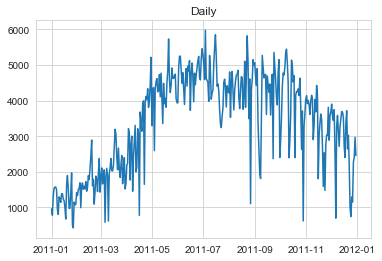

In [5]:
# plot daily chart
plt.plot(df_daily)
plt.title('Daily')
plt.show()

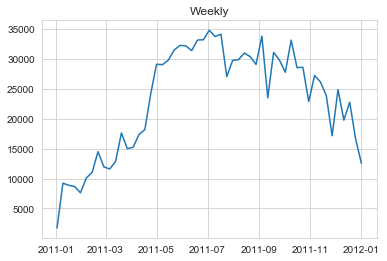

In [6]:
# plot weekly chart
plt.plot(df_weekly)
plt.title('Weekly')
plt.show()

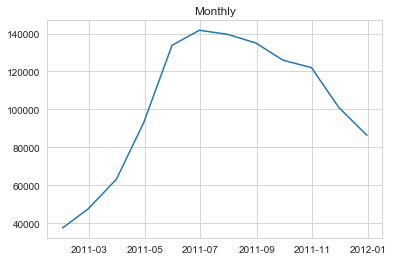

In [7]:
# plot monthly chart
plt.plot(df_monthly)
plt.title('Monthly')
plt.show()

# Autocorrelation and Partial Autocorrelation

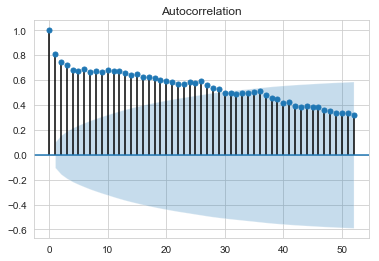

In [8]:
# Daily
lags = 52
# acf
plot_acf(df_daily, lags=lags)
plt.show()

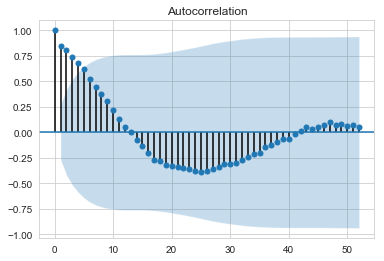

In [9]:
# Weekly
lags = 52
# acf
plot_acf(df_weekly, lags=lags)
plt.show()

# Differencing 1st order

In [10]:
df_daily.diff()

,trips
Start date,
2011-01-01,nan
2011-01-02,-178.00
2011-01-03,520.00
2011-01-04,235.00
2011-01-05,35.00
2011-01-06,2.00
2011-01-07,-80.00
2011-01-08,-554.00
2011-01-09,-137.00


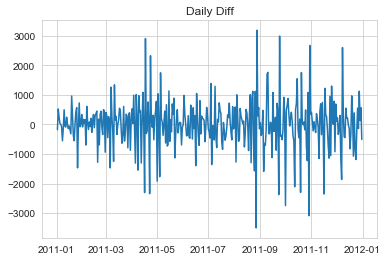

In [11]:
# plot the daily diff
plt.plot(df_daily.diff())
plt.title('Daily Diff')
plt.show()

In [12]:
# TODO: What is the day with the highest absolute difference?
df_daily['diff'] = df_daily['trips'].diff()
df_daily[df_daily['diff'] < -3000]

,trips,diff
Start date,,
2011-08-27,1105,-3502.00
2011-10-29,619,-3089.00


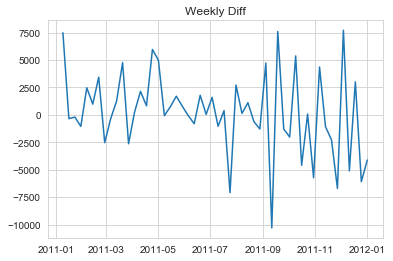

In [13]:
# plot the weekly diff
plt.plot(df_weekly.diff())
plt.title('Weekly Diff')
plt.show()

# Time Series Decomposition

[6.0, 4.0]


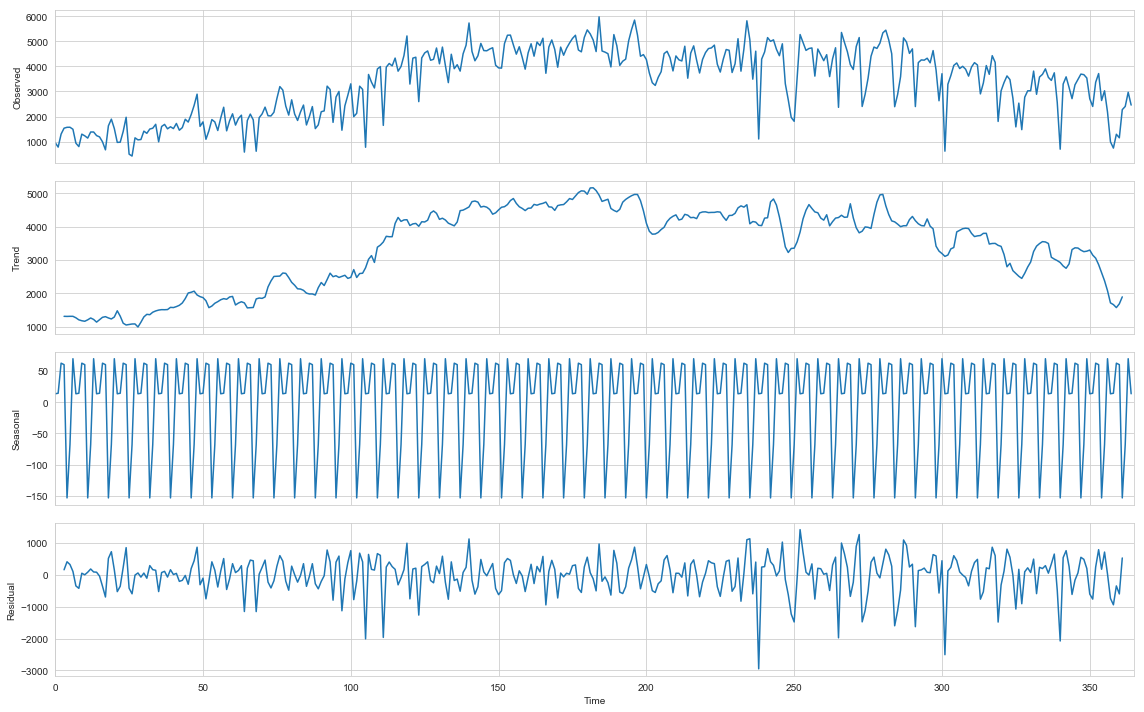

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
print(rcParams['figure.figsize'])
rcParams['figure.figsize'] = 16, 10
series = df_daily['trips'].dropna().values
result = seasonal_decompose(series, model='additive', freq=7)
result.plot()
plt.show()
rcParams['figure.figsize'] = 6, 4

In [15]:
df_daily['dow'] = df_daily.index.dayofweek
df_daily['trend'] = result.trend
df_daily['seasonal'] = result.seasonal
df_daily['resid'] = result.resid
df_daily

,trips,diff,dow,trend,seasonal,resid
Start date,,,,,,
2011-01-01,959,nan,5,nan,13.66,nan
2011-01-02,781,-178.00,6,nan,14.51,nan
2011-01-03,1301,520.00,0,nan,62.73,nan
2011-01-04,1536,235.00,1,1316.29,60.37,159.34
2011-01-05,1571,35.00,2,1313.43,-153.38,410.95
2011-01-06,1573,2.00,3,1316.43,-67.79,324.36
2011-01-07,1493,-80.00,4,1316.00,69.90,107.10
2011-01-08,939,-554.00,5,1272.43,13.66,-347.09
2011-01-09,802,-137.00,6,1211.00,14.51,-423.51


# Smoothing

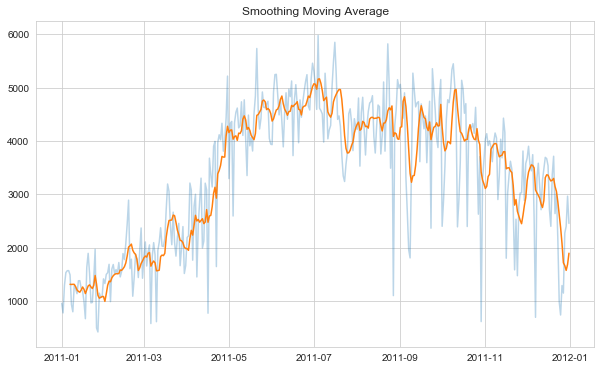

In [16]:
# rolling - moving average
plt.figure(figsize=(10,6))
plt.title('Smoothing Moving Average')
plt.plot(df_daily['trips'], alpha=0.3)
plt.plot(df_daily['trips'].rolling(window=7).mean())
plt.show()

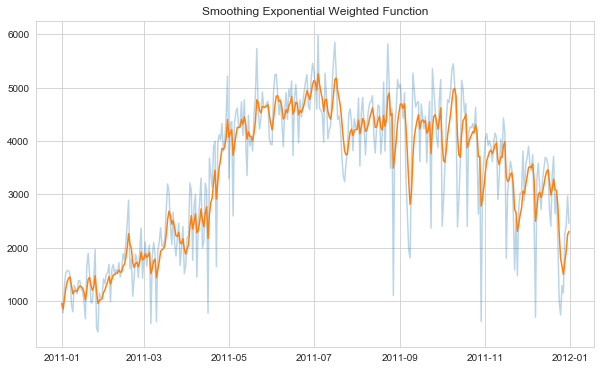

In [17]:
# exponential weighted functions
plt.figure(figsize=(10,6))
plt.title('Smoothing Exponential Weighted Function')
plt.plot(df_daily['trips'], alpha=0.3)
plt.plot(df_daily['trips'].ewm(alpha=0.3).mean())
plt.show()

# Simple anomaly detection

-0.6478052759562971
586.9858539811474


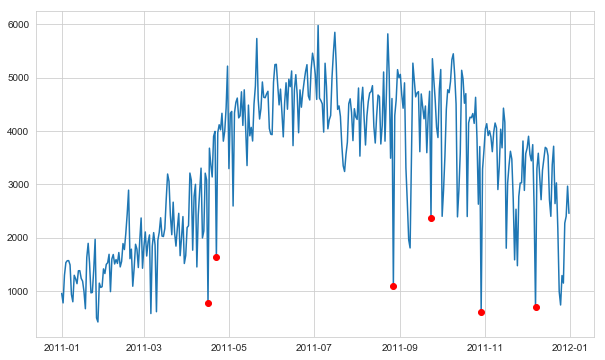

In [18]:
resid_mean = df_daily['resid'].dropna().mean()
resid_std = df_daily['resid'].dropna().std()
print(resid_mean)
print(resid_std)

n_std = 3
df_anomaly = df_daily[(df_daily['resid'] < resid_mean - n_std * resid_std)|(df_daily['resid'] > resid_mean + n_std * resid_std)]

plt.figure(figsize=(10,6))
plt.plot(df_daily['trips'])
for k, v in df_anomaly.iterrows():
    plt.plot(k, v['trips'], 'or')
plt.show()

# Time series prediction

## Stats approach

Start date
2011-12-25     742
2011-12-26    1293
2011-12-27    1152
2011-12-28    2275
2011-12-29    2403
2011-12-30    2967
2011-12-31    2457
Freq: D, Name: trips, dtype: int64
2012-01-01   2617.20
2012-01-02   2445.04
2012-01-03   2400.36
2012-01-04   2241.12
2012-01-05   2169.44
2012-01-06   2132.64
2012-01-07   2252.13
2012-01-08   2200.02
2012-01-09   2346.21
2012-01-10   2364.92
2012-01-11   2348.84
2012-01-12   2430.25
2012-01-13   2427.42
2012-01-14   2487.47
2012-01-15   2457.73
Freq: D, dtype: float64


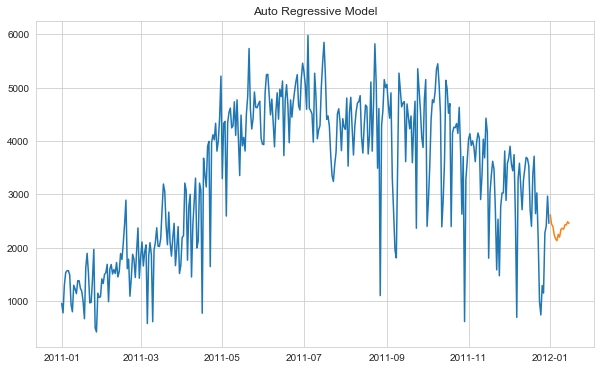

In [19]:
# Autoregressive Model
from statsmodels.tsa.ar_model import AR
model = AR(df_daily['trips'])
# fit model
model_fit = model.fit()
print(df_daily['trips'].tail(7))
# calculate prediction
yhat = model_fit.predict(len(df_daily['trips']), len(df_daily['trips'])+14)
print(yhat)
# plot results
plt.figure(figsize=(10,6))
plt.title('Auto Regressive Model')
plt.plot(df_daily['trips'])
plt.plot(yhat)
plt.show()

2012-01-01   2759.98
2012-01-02   3357.41
2012-01-03   3357.41
2012-01-04   3357.41
2012-01-05   3357.41
2012-01-06   3357.41
2012-01-07   3357.41
2012-01-08   3357.41
2012-01-09   3357.41
2012-01-10   3357.41
2012-01-11   3357.41
2012-01-12   3357.41
2012-01-13   3357.41
2012-01-14   3357.41
2012-01-15   3357.41
Freq: D, dtype: float64


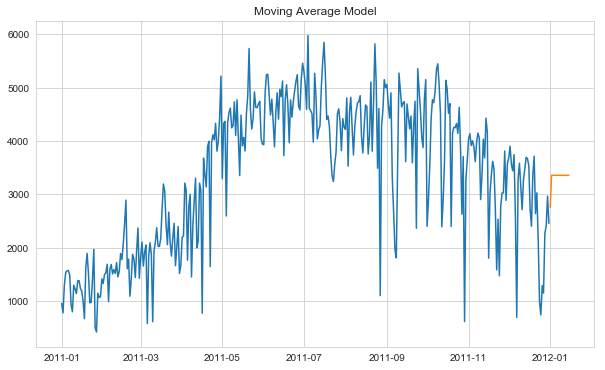

In [20]:
# Moving Average
from statsmodels.tsa.arima_model import ARMA
# fit model
model = ARMA(df_daily['trips'], order=(0, 1))
model_fit = model.fit()
# calculate prediction
yhat = model_fit.predict(len(df_daily['trips']), len(df_daily['trips'])+14)
print(yhat)
# plot results
plt.figure(figsize=(10,6))
plt.title('Moving Average Model')
plt.plot(df_daily['trips'])
plt.plot(yhat)
plt.show()

2012-01-01   2290.74
2012-01-02   2295.72
2012-01-03   2300.66
2012-01-04   2305.54
2012-01-05   2310.37
2012-01-06   2315.15
2012-01-07   2319.89
2012-01-08   2324.58
2012-01-09   2329.22
2012-01-10   2333.82
2012-01-11   2338.37
2012-01-12   2342.87
2012-01-13   2347.33
2012-01-14   2351.75
2012-01-15   2356.12
Freq: D, dtype: float64


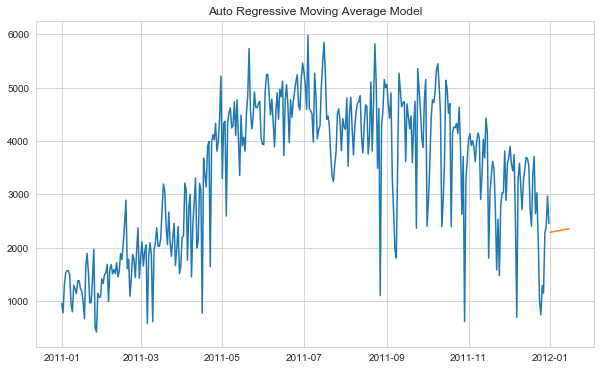

In [21]:
# Autoregressive Moving Average
from statsmodels.tsa.arima_model import ARMA
# fit model
model = ARMA(df_daily['trips'], order=(1, 1))
model_fit = model.fit()
# calculate prediction
yhat = model_fit.predict(len(df_daily['trips']), len(df_daily['trips'])+14)
print(yhat)
# plot results
plt.figure(figsize=(10,6))
plt.title('Auto Regressive Moving Average Model')
plt.plot(df_daily['trips'])
plt.plot(yhat)
plt.show()

2012-01-01   1134.26
2012-01-02   1954.94
2012-01-03   2035.23
2012-01-04   2340.43
2012-01-05   2542.48
2012-01-06   2589.81
2012-01-07   1023.36
2012-01-08    960.82
2012-01-09   1781.51
2012-01-10   1861.80
2012-01-11   2167.00
2012-01-12   2369.05
2012-01-13   2416.38
2012-01-14    849.92
2012-01-15    787.39
Freq: D, dtype: float64


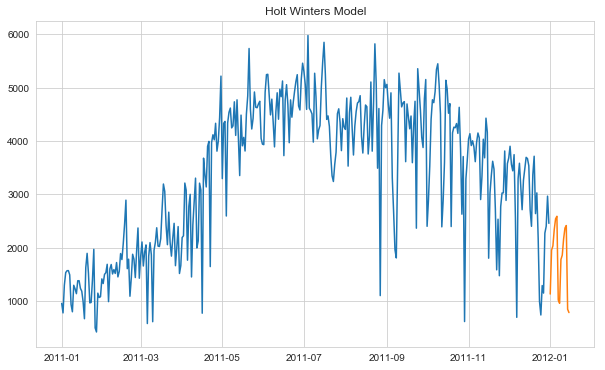

In [22]:
# Holt Winters 
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# fit model
model = ExponentialSmoothing(df_daily['trips'], trend='add', seasonal='add', seasonal_periods=7)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.1, smoothing_seasonal=0.5)
# calculate prediction
yhat = model_fit.predict(len(df_daily['trips']), len(df_daily['trips'])+14)
print(yhat)
plt.figure(figsize=(10,6))
plt.title('Holt Winters Model')
plt.plot(df_daily['trips'])
plt.plot(yhat)
plt.show()

In [23]:
 from statsmodels.tsa.holtwinters import ExponentialSmoothing
# fit model
model = ExponentialSmoothing(df_daily['trips'], trend='add', seasonal='add', seasonal_periods=7)
for l in range(0, 10, 2):
    for sl in range(0, 10, 2):
        for se in range(0, 10, 2):
            model_fit = model.fit(smoothing_level=l/10.0, smoothing_slope=sl/10.0, smoothing_seasonal=se/10.0)
            # calculate prediction
            yhat = model_fit.predict(len(df_daily['trips']),len(df_daily['trips'])+2)
            print(l/10.0, sl/10.0, se/10.0)
            print(yhat)

0.0 0.0 0.0
2012-01-01    781.00
2012-01-02   1301.00
2012-01-03   1536.00
Freq: D, dtype: float64
0.0 0.0 0.2
2012-01-01   2766.56
2012-01-02   3194.04
2012-01-03   2997.84
Freq: D, dtype: float64
0.0 0.0 0.4
2012-01-01   2003.52
2012-01-02   2596.44
2012-01-03   2470.84
Freq: D, dtype: float64
0.0 0.0 0.6
2012-01-01   1497.21
2012-01-02   2133.42
2012-01-03   2086.35
Freq: D, dtype: float64
0.0 0.0 0.8
2012-01-01   1091.76
2012-01-02   1707.22
2012-01-03   1648.00
Freq: D, dtype: float64
0.0 0.2 0.0
2012-01-01    781.00
2012-01-02   1301.00
2012-01-03   1536.00
Freq: D, dtype: float64
0.0 0.2 0.2
2012-01-01   2766.56
2012-01-02   3194.04
2012-01-03   2997.84
Freq: D, dtype: float64
0.0 0.2 0.4
2012-01-01   2003.52
2012-01-02   2596.44
2012-01-03   2470.84
Freq: D, dtype: float64
0.0 0.2 0.6
2012-01-01   1497.21
2012-01-02   2133.42
2012-01-03   2086.35
Freq: D, dtype: float64
0.0 0.2 0.8
2012-01-01   1091.76
2012-01-02   1707.22
2012-01-03   1648.00
Freq: D, dtype: float64
0.0 0.4 0.

0.6 0.4 0.2
2012-01-01   3273.54
2012-01-02   4422.91
2012-01-03   4556.25
Freq: D, dtype: float64
0.6 0.4 0.4
2012-01-01   3067.52
2012-01-02   3955.94
2012-01-03   3903.89
Freq: D, dtype: float64
0.6 0.4 0.6
2012-01-01   1791.45
2012-01-02   2438.14
2012-01-03   3106.88
Freq: D, dtype: float64
0.6 0.4 0.8
2012-01-01    144464.24
2012-01-02     37935.04
2012-01-03   -185065.71
Freq: D, dtype: float64
0.6 0.6 0.0
2012-01-01   3059.46
2012-01-02   3296.22
2012-01-03   3476.56
Freq: D, dtype: float64
0.6 0.6 0.2
2012-01-01   3598.84
2012-01-02   4787.37
2012-01-03   4818.73
Freq: D, dtype: float64
0.6 0.6 0.4
2012-01-01   2856.04
2012-01-02   3439.99
2012-01-03   3139.48
Freq: D, dtype: float64
0.6 0.6 0.6
2012-01-01   2057355.85
2012-01-02   4297398.51
2012-01-03   6126379.92
Freq: D, dtype: float64
0.6 0.6 0.8
2012-01-01    429643270.80
2012-01-02    858565541.17
2012-01-03   1193709961.30
Freq: D, dtype: float64
0.6 0.8 0.0
2012-01-01   2853.43
2012-01-02   3739.07
2012-01-03   4339.7

## Machine Learning approach

In [24]:
# Problem definition
# Load the data
# Feature Engineering
# Model Training
# Model Evaluation

## Problem definition
Predict the system usage for tomorrow

## Load the data

In [25]:
# https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset
df_day = pd.read_csv('data/day.csv')
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.34,0.36,0.81,0.16,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.36,0.35,0.70,0.25,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.20,0.19,0.44,0.25,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.20,0.21,0.59,0.16,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.23,0.23,0.44,0.19,82,1518,1600


In [26]:
# Convert the date and set as the index
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_day.set_index('dteday', inplace=True)
df_day.head(10)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.34,0.36,0.81,0.16,331,654,985
2011-01-02,2,1,0,1,0,0,0,2,0.36,0.35,0.70,0.25,131,670,801
2011-01-03,3,1,0,1,0,1,1,1,0.20,0.19,0.44,0.25,120,1229,1349
2011-01-04,4,1,0,1,0,2,1,1,0.20,0.21,0.59,0.16,108,1454,1562
2011-01-05,5,1,0,1,0,3,1,1,0.23,0.23,0.44,0.19,82,1518,1600
2011-01-06,6,1,0,1,0,4,1,1,0.20,0.23,0.52,0.09,88,1518,1606
2011-01-07,7,1,0,1,0,5,1,2,0.20,0.21,0.50,0.17,148,1362,1510
2011-01-08,8,1,0,1,0,6,0,2,0.17,0.16,0.54,0.27,68,891,959
2011-01-09,9,1,0,1,0,0,0,1,0.14,0.12,0.43,0.36,54,768,822


## Feature Engineering

In [27]:
# Shift example
df_cnt = df_day[['cnt']]
df_cnt['shift_1'] = df_cnt['cnt'].shift(1)
df_cnt[['shift_1', 'cnt']].head(10)

C:\Users\Ary Bressane\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,shift_1,cnt
dteday,,
2011-01-01,nan,985
2011-01-02,985.00,801
2011-01-03,801.00,1349
2011-01-04,1349.00,1562
2011-01-05,1562.00,1600
2011-01-06,1600.00,1606
2011-01-07,1606.00,1510
2011-01-08,1510.00,959
2011-01-09,959.00,822


In [28]:
# TODO: apply shift for X days
df_cnt = df_day[['cnt']]
for i in range(1, 8):
    df_cnt['shift_'+str(i)] = df_cnt['cnt'].shift(i)
df_cnt

C:\Users\Ary Bressane\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,cnt,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7
dteday,,,,,,,,
2011-01-01,985,nan,nan,nan,nan,nan,nan,nan
2011-01-02,801,985.00,nan,nan,nan,nan,nan,nan
2011-01-03,1349,801.00,985.00,nan,nan,nan,nan,nan
2011-01-04,1562,1349.00,801.00,985.00,nan,nan,nan,nan
2011-01-05,1600,1562.00,1349.00,801.00,985.00,nan,nan,nan
2011-01-06,1606,1600.00,1562.00,1349.00,801.00,985.00,nan,nan
2011-01-07,1510,1606.00,1600.00,1562.00,1349.00,801.00,985.00,nan
2011-01-08,959,1510.00,1606.00,1600.00,1562.00,1349.00,801.00,985.00
2011-01-09,822,959.00,1510.00,1606.00,1600.00,1562.00,1349.00,801.00


In [29]:
# Handle Missing Values
df_cnt = df_cnt.dropna()

In [30]:
# feature engineering
X_columns = [x for x in df_cnt.columns if x != 'cnt']
y_column = ['cnt']

## Model Training

In [31]:
# split the data

# do NOT shuffle the data
#df = df.sample(frac=1)

threshold = 0.9
absolute_threshold = int(len(df_cnt)*threshold)
print(len(df_cnt), absolute_threshold)

X_train = df_cnt.iloc[:absolute_threshold][X_columns]
y_train = df_cnt.iloc[:absolute_threshold][y_column]

X_test = df_cnt.iloc[absolute_threshold:][X_columns]
y_test = df_cnt.iloc[absolute_threshold:][y_column]

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

724 651
X_train (651, 7)
y_train (651, 1)
X_test (73, 7)
y_test (73, 1)


In [32]:
# TODO: Train a linear regression or other model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [33]:
# TODO: Calculate the MAE
from sklearn.metrics import mean_absolute_error
print('MAE', mean_absolute_error(y_test, y_pred))

MAE 954.3351079037855


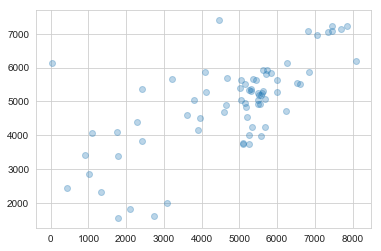

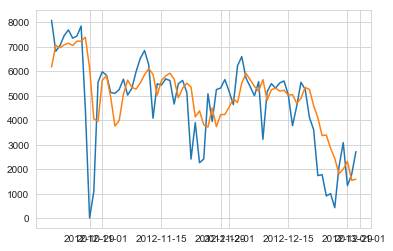

In [34]:
# plot the results
plt.scatter(y_test, y_pred, alpha=0.3)
plt.show()
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, y_pred)
plt.show()

In [35]:
#df_cnt = df_day[['cnt', 'atemp', 'holiday', 'weekday', 'workingday']]
df_cnt = df_day[['cnt', 'atemp']]
#for i in range(1, 15):
for i in range(1, 8):
    df_cnt['cnt_shift_'+str(i)] = df_cnt['cnt'].shift(i)
    df_cnt['temp_shift_'+str(i)] = df_cnt['atemp'].shift(i)
df_cnt

# Handle Missing Values
df_cnt = df_cnt.dropna()

# feature engineering
X_columns = [x for x in df_cnt.columns if x != 'cnt']
y_column = ['cnt']
print(X_columns)

# split the data

# do NOT shuffle the data
#df = df.sample(frac=1)

threshold = 0.9
absolute_threshold = int(len(df_cnt)*threshold)
print(len(df_cnt), absolute_threshold)

X_train = df_cnt.iloc[:absolute_threshold][X_columns]
y_train = df_cnt.iloc[:absolute_threshold][y_column]

X_test = df_cnt.iloc[absolute_threshold:][X_columns]
y_test = df_cnt.iloc[absolute_threshold:][y_column]

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

C:\Users\Ary Bressane\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Ary Bressane\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


['atemp', 'cnt_shift_1', 'temp_shift_1', 'cnt_shift_2', 'temp_shift_2', 'cnt_shift_3', 'temp_shift_3', 'cnt_shift_4', 'temp_shift_4', 'cnt_shift_5', 'temp_shift_5', 'cnt_shift_6', 'temp_shift_6', 'cnt_shift_7', 'temp_shift_7']
724 651
X_train (651, 15)
y_train (651, 1)
X_test (73, 15)
y_test (73, 1)


MAE 905.2297690271472


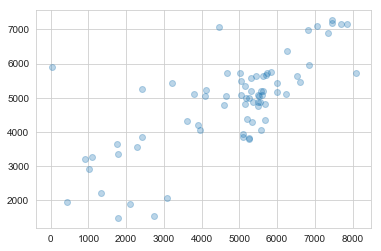

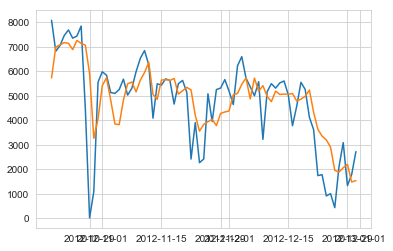

In [36]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error
print('MAE', mean_absolute_error(y_test, y_pred))

# plot the results
plt.scatter(y_test, y_pred, alpha=0.3)
plt.show()
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, y_pred)
plt.show()

In [37]:
import pickle

# save the model to file
filename = 'model.pkl'
pickle.dump(model, open(filename, 'wb'))
 
# load the model from file
loaded_model = pickle.load(open(filename, 'rb'))

result = loaded_model.predict([[0.5,5000,0.2,7000,0.3,7500,0.7,7500,0.1,5800,0.1,6600,0.5,7100,0.5]])
print(result)

[[7541.60298923]]
